In [76]:
# All imports
#from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from google.colab import files

In [2]:
# Mount drive
#drive.mount('/content/drive/')

In [ ]:
pip install redshift_connector
import redshift_connector
conn = redshift_connector.connect(
     host='redshift-cluster-1.cigoy313aggq.us-east-1.redshift.amazonaws.com',
     database='dev',
     port=5439,
     user='awsuser',
     password='Winter2023'
  )


# Create a Cursor object
cursor = conn.cursor()



# Query a table using the Cursor
cursor.execute("select * from book")
                
#Retrieve the query result set
result: tuple = cursor.fetchall()
print(result)
#(['One Hundred Years of Solitude', 'Gabriel García Márquez'], ['A Brief History of Time', 'Stephen Hawking'])
                


In [50]:
#Connect to the cluster
!pip install mysql.connector
import mysql.connector
from mysql.connector import Error




[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:

def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

pw = 'Fall2022' # IMPORTANT! Put your MySQL Terminal password here.
db = "school" # This is the name of the database we will create in the next step - call it whatever you like.

connection = create_server_connection("localhost", "root", pw)

MySQL Database connection successful


In [5]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

create_database_query = "CREATE DATABASE school"
create_database(connection, create_database_query)

Error: '1007 (HY000): Can't create database 'school'; database exists'


In [52]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [54]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [112]:
# Assign our SQL command to a python variable using triple quotes to create a multi-line string

drop_table= '''
Drop table finalProject
'''
    
    
create_finalProject_table = """
CREATE TABLE if not exists finalProject (
  Id INT PRIMARY KEY AUTO_INCREMENT,
  Entity VARCHAR(32) NOT NULL,
  Year INT NOT NULL,
  Annual_CO₂_emissions float,
  GDP_per_capita float,
  Population float ,
  per_gdp_CO2 float ,
  Annual_nitrous_oxide_emissions float,
Annual_methane_emissions float,
per_capita_CO2 float,
C02_emmissions_worldtotal float
);
 """

connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database
execute_query(connection, drop_table) # Execute our defined query
execute_query(connection, create_finalProject_table) # Execute our defined query





MySQL Database connection successful
Query successful
Query successful


In [55]:
def execute_list_query(connection, sql, val):
    cursor = connection.cursor()
    try:
        cursor.executemany(sql, val)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [73]:

df_co2 = pd.read_csv("./CSV/annual-co2-emissions-per-country.csv")
df_pop = pd.read_csv('./CSV/population-and-demography.csv')
df_gdp = pd.read_csv('./CSV/gdp-per-capita.csv')
df_methane = pd.read_csv('./CSV/methane-emissions.csv')
df_nitrous = pd.read_csv('./CSV/nitrous-oxide-emissions.csv')


THIS IS THE MERGE PART 

In [105]:

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)


pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

countries_array = ['Russia', 'China', 'United States', 'United Kingdom','Canada', 'World']



df_co2_noname = df_co2[['Entity','Year','Annual CO₂ emissions']] 

df_co2_final = df_co2_noname[(df_co2_noname['Entity'].isin(countries_array))]

df_co2_final

,Entity,Year,Annual CO₂ emissions
5320,Canada,1785,3.664000e+03
5321,Canada,1786,3.664000e+03
5322,Canada,1787,3.664000e+03
5323,Canada,1788,3.664000e+03
5324,Canada,1789,3.664000e+03
...,...,...,...
31081,World,2017,3.609674e+10
31082,World,2018,3.682651e+10
31083,World,2019,3.708256e+10
31084,World,2020,3.526409e+10


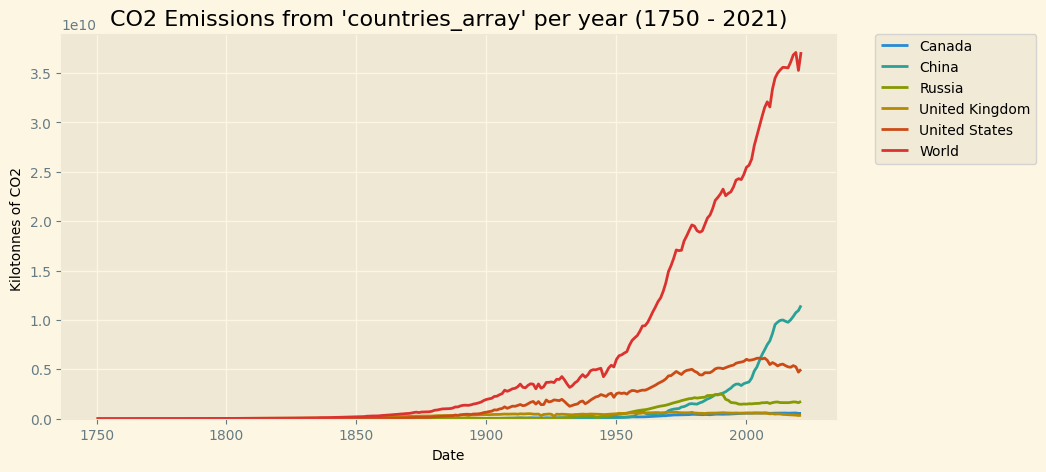

In [81]:
# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  #plt.xticks(range(1750,2021), range(1750,2021))

  co2_country = sns.lineplot(
      data=df_co2_final,
      x='Year',
      y='Annual CO₂ emissions',
      hue='Entity'
  )
  co2_country.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2 ',
      ylim=(0,None),
      title='''CO2 Emissions from 'countries_array' per year (1750 - 2021)'''
  )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  plt.show()
  #plt.legend(title='')

In [34]:

#df_methane = pd.read_csv(df_methane)

df_methane_noname = df_methane[['Entity','Year','Annual methane emissions']] 

df_methane_final = df_methane_noname[(df_methane_noname['Entity'].isin(countries_array))]

df_methane_final

,Entity,Year,Annual methane emissions
5814,Canada,1851,9.772536e+06
5815,Canada,1852,9.972014e+06
5816,Canada,1853,1.034139e+07
5817,Canada,1854,1.071860e+07
5818,Canada,1855,1.110386e+07
...,...,...,...
34708,World,2017,1.012901e+10
34709,World,2018,1.021516e+10
34710,World,2019,1.032124e+10
34711,World,2020,1.037299e+10


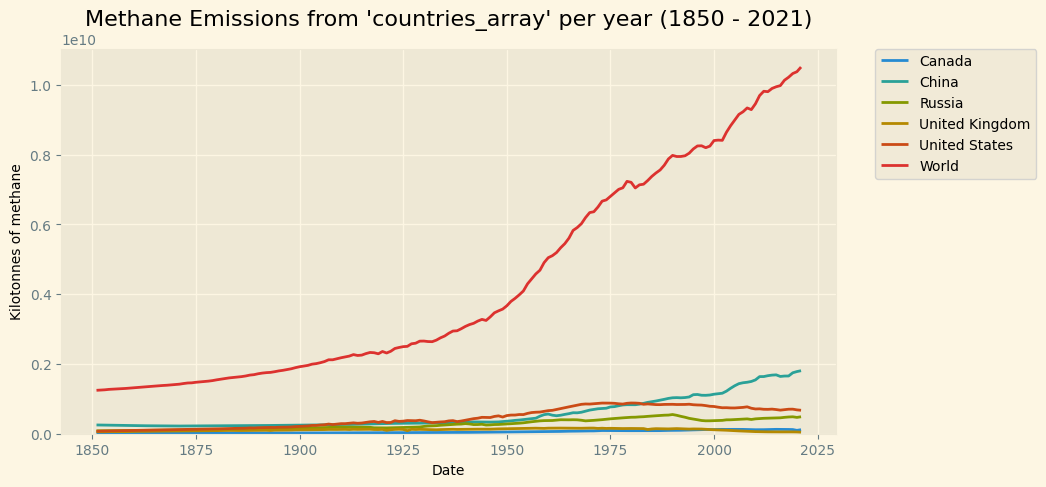

In [84]:
# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  #plt.xticks(range(1750,2021), range(1750,2021))

  ax_canada_vs_canada_no_factory = sns.lineplot(
      data=df_methane_final,
      x='Year',
      y='Annual methane emissions',
      hue='Entity'
  )
  ax_canada_vs_canada_no_factory.set(
      xlabel='Date',
      ylabel='Kilotonnes of methane',
      ylim=(0,None),
      title='''Methane Emissions from 'countries_array' per year (1850 - 2021)'''
  )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  plt.show()
  #plt.legend(title='')

In [25]:
#df_nitrous = pd.read_csv(nitrous_path)

df_nitrous_noname = df_nitrous[['Entity','Year','Annual nitrous oxide emissions']] 

df_nitrous_final = df_nitrous_noname[(df_nitrous_noname['Entity'].isin(countries_array))]

df_nitrous_final

,Entity,Year,Annual nitrous oxide emissions
5985,Canada,1851,3.138664e+06
5986,Canada,1852,3.190522e+06
5987,Canada,1853,3.240610e+06
5988,Canada,1854,3.288250e+06
5989,Canada,1855,3.332765e+06
...,...,...,...
35050,World,2017,2.875266e+09
35051,World,2018,2.870180e+09
35052,World,2019,2.885550e+09
35053,World,2020,2.917279e+09


In [36]:
# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  #plt.xticks(range(1750,2021), range(1750,2021))

  ax_canada_vs_canada_no_factory = sns.lineplot(
      data=df_nitrous_final,
      x='Year',
      y='Annual nitrous oxide emissions',
      hue='Entity'
  )
  ax_canada_vs_canada_no_factory.set(
      xlabel='Date',
      ylabel='Kilotonnes of nitrous oxide',
      ylim=(0,None),
      title='''Nitrous oxide Emissions from 'countries_array' per year (1850 - 2021)'''
  )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  #plt.legend(title='')

In [103]:
df_pop2 = df_pop[["Country name", "Year", "Population"]]
#print(df_pop2)

df_pop3 = pd.merge(

    left = df_co2,
    right = df_gdp,
    left_on = ["Entity","Year"],
    right_on = ["Entity","Year"]

)

df_pop3 = pd.merge(

    left = df_pop3,
    right = df_pop,
    left_on = ["Entity","Year"],
    right_on = ["Country name","Year"]

)

df_pop2 = pd.merge(

    left = df_co2,
    right = df_pop,
    left_on = ["Entity","Year"],
    right_on = ["Country name","Year"]

)




df_pop3["per_capita_CO2"] = df_pop3["Annual CO₂ emissions"]/df_pop3["Population"]
df_pop3["per_gdp_CO2"] = df_pop3["Annual CO₂ emissions"]*1000/(df_pop3["GDP per capita"]*df_pop3["Population"])

#print(df_pop2)
# Filter the df_pop2 dataframe to contain only the 'World' rows
df_world = df_pop2[df_pop2['Entity'] == 'World'][['Year', 'Annual CO₂ emissions']]
#print(df_world)
# Merge the filtered dataframe with the original dataframe on the 'Year' column
df_pop2 = pd.merge(df_pop2, df_world, on='Year', how='left', suffixes=('', '_world'))
#print(df_pop2)
# Calculate the percentage of global CO2 emissions for each country and year
df_pop2['CO₂ emissions %'] = df_pop2['Annual CO₂ emissions'] / df_pop2['Annual CO₂ emissions_world'] * 100
#print(df_pop2)
# Drop the redundant 'Annual CO₂ emissions_world' column
df_pop2 = df_pop2.drop('Annual CO₂ emissions_world', axis=1)



df_pop2_final = df_pop2[(df_pop2['Entity'].isin(countries_array))]
#df_country_final = df_country[(df_country['Entity'].isin(countries_array))]
#df_pop2_final

df_pop3_final = df_pop3[(df_pop3['Entity'].isin(countries_array))]
#from google.colab import files
#df_pop3_final.to_csv('output.csv', encoding = 'utf-8-sig') 
#@#files.download('output.csv')
df_pop3_final = df_pop3_final.drop(columns = ['Code_x', 'Code_y', '417485-annotations', 'Country name', 'Population of children under the age of 1', 'Population aged 20 to 29 years'	,'Population aged 30 to 39 years'	,'Population aged 40 to 49 years',	'Population aged 50 to 59 years',	'Population aged 60 to 69 years',	'Population aged 70 to 79 years',	'Population aged 80 to 89 years',	'Population aged 90 to 99 years'	,'Population older than 100 years' ])
df_pop3_final = df_pop3_final.drop(columns=['Population of children under the age of 5','Population of children under the age of 15','Population under the age of 25','Population aged 15 to 64 years','Population older than 15 years','Population older than 18 years','Population at age 1','Population aged 1 to 4 years','Population aged 5 to 9 years','Population aged 10 to 14 years','Population aged 15 to 19 years'])
df_pop2_final = df_pop2_final.drop(columns = [ 'Country name', 'Population of children under the age of 1', 'Population aged 20 to 29 years'	,'Population aged 30 to 39 years'	,'Population aged 40 to 49 years',	'Population aged 50 to 59 years',	'Population aged 60 to 69 years',	'Population aged 70 to 79 years',	'Population aged 80 to 89 years',	'Population aged 90 to 99 years'	,'Population older than 100 years' ])
df_pop2_final = df_pop2_final.drop(columns=['Population of children under the age of 5','Population of children under the age of 15','Population under the age of 25','Population aged 15 to 64 years','Population older than 15 years','Population older than 18 years','Population at age 1','Population aged 1 to 4 years','Population aged 5 to 9 years','Population aged 10 to 14 years','Population aged 15 to 19 years'])
df_pop2_final = df_pop2_final.drop(columns=['Code','Annual CO₂ emissions','Population'])

df_pop3_final = pd.merge(
    left = df_pop3_final,
    right = df_nitrous_final,
    left_on = ["Entity","Year"],
    right_on = ["Entity","Year"]
)
df_pop3_final = pd.merge(
    
 left = df_pop3_final,
    right = df_methane_final,
    left_on = ["Entity","Year"],
    right_on = ["Entity","Year"]

)
df_pop3_final = pd.merge(
    
 left = df_pop3_final,
    right = df_pop2_final,
    left_on = ["Entity","Year"],
    right_on = ["Entity","Year"]

)

df_pop3_final


,Entity,Year,Annual CO₂ emissions,GDP per capita,Population,per_capita_CO2,per_gdp_CO2,Annual nitrous oxide emissions,Annual methane emissions,CO₂ emissions %
0,Canada,1950,1.541338e+08,11622.0000,13743068,11.215382,0.965013,1.650352e+07,4.749925e+07,2.567496
1,Canada,1951,1.626780e+08,12007.0000,14085723,11.549143,0.961867,1.676840e+07,4.916457e+07,2.549894
2,Canada,1952,1.594088e+08,12486.0000,14485746,11.004525,0.881349,1.708863e+07,5.007333e+07,2.465442
3,Canada,1953,1.606082e+08,12726.0000,14901533,10.777964,0.846925,1.745643e+07,5.130872e+07,2.415973
4,Canada,1954,1.629677e+08,12272.0000,15323199,10.635355,0.866636,1.786397e+07,5.273654e+07,2.400124
5,Canada,1955,1.694732e+08,13072.0000,15733926,10.771194,0.823990,1.830346e+07,5.465562e+07,2.276872
6,Canada,1956,1.898024e+08,13791.0000,16167046,11.740081,0.851286,1.876709e+07,5.720646e+07,2.395209
7,Canada,1957,1.828114e+08,13719.0000,16650052,10.979631,0.800323,1.924706e+07,5.822120e+07,2.233344
8,Canada,1958,1.821552e+08,13603.0000,17113392,10.644015,0.782476,1.973556e+07,5.964005e+07,2.163974
9,Canada,1959,1.844814e+08,13829.0000,17524910,10.526808,0.761213,2.022478e+07,6.120855e+07,2.083071


In [48]:
sql1 = '''
   INSERT INTO finalProject (Entity, Year, Annual_CO₂_emissions,  GDP_per_capita, Population, per_gdp_CO2, Annual_nitrous_oxide_emissions , Annual_methane_emissions, per_capita_CO2 ,
C02_emmissions_worldtotal)
    VALUES ( %s, %s, %s, %s, %s, %s, %s, %s,%s,%s)
  '''

val1 = df_pop3_final.values.tolist()
print(val1)
connection = create_db_connection("localhost", "root", pw, db)
execute_list_query(connection, sql1, val1)

[['Canada', 1950, 154133760.0, 11622.0, 13743068, 0.965013094471608, 16503524.0, 47499252.0], ['Canada', 1951, 162678030.0, 12007.0, 14085723, 0.9618674987784116, 16768398.0, 49164572.0], ['Canada', 1952, 159408750.0, 12486.0, 14485746, 0.8813490888852804, 17088634.0, 50073332.0], ['Canada', 1953, 160608180.0, 12726.0, 14901533, 0.8469246882502753, 17456428.0, 51308716.0], ['Canada', 1954, 162967660.0, 12272.0, 15323199, 0.8666358318262166, 17863972.0, 52736540.0], ['Canada', 1955, 169473170.0, 13072.0, 15733926, 0.8239897523510467, 18303464.0, 54655624.0], ['Canada', 1956, 189802430.0, 13791.0, 16167046, 0.8512856954936123, 18767094.0, 57206456.0], ['Canada', 1957, 182811420.0, 13719.0, 16650052, 0.8003229516821004, 19247062.0, 58221200.0], ['Canada', 1958, 182155200.0, 13603.0, 17113392, 0.7824755519272668, 19735558.0, 59640052.0], ['Canada', 1959, 184481360.0, 13829.0, 17524910, 0.7612125129042772, 20224778.0, 61208550.0], ['Canada', 1960, 192716180.0, 13952.0, 17909358, 0.771261571

In [39]:
# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  #plt.xticks(range(1750,2021), range(1750,2021))

  co2_per_capita = sns.lineplot(
      data=df_pop2_final,
      x='Year',
      y='per_capita_CO2',
      hue='Entity'
  )
  co2_per_capita.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO₂',
      ylim=(0,None),
      title='''CO₂ Emissions per capita from 'countries_array' per year (1950 - 2020)'''
  )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  #plt.legend(title='')

In [40]:
# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  #plt.xticks(range(1750,2021), range(1750,2021))

  co2_per_capita = sns.lineplot(
      data=df_pop2_final,
      x='Year',
      y='CO₂ emissions %',
      hue='Entity'
  )
  co2_per_capita.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO₂',
      ylim=(0,None),
      title='''CO₂ Emissions compared worldwide from 'countries_array' per year (1950 - 2020)'''
  )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  
  plt.savefig('co2_emission_gdp.png', bbox_inches='tight')
  #files.download('co2_emission_gdp.png')
  #plt.legend(title='')

NameError: name 'files' is not defined

In [41]:
# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  #plt.xticks(range(1750,2021), range(1750,2021))

  co2_per_capita = sns.lineplot(
      data=df_pop3_final,
      x='Year',
      y='per_gdp_CO2',
      hue='Entity'
  )
  co2_per_capita.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO₂',
      ylim=(0,None),
      title='''CO₂ Emissions compared worldwide from 'countries_array' per year (1950 - 2020)'''
  )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  #plt.legend(title='')

#plt.savefig('co2_emission_gdp.png', bbox_inches='tight')
#files.download('co2_emission_gdp.png')
 

# New Section

MySQL Database connection successful
Error: 'Unread result found'


In [68]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [ ]:
firstQuery ='''SELECT ENTITY, Annual_CO₂_emissions, Year from finalProject;'''
connection = create_db_connection("localhost", "root", pw, db)
df_co2_graph = read_query(connection, firstQuery)

In [ ]:
df_co2_graph

In [ ]:
result = df_co2_graph.concat(df_list, axis=1)

In [ ]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [ ]:
co2Query = '''
    SELECT Entity,
    Annual_CO₂_emissions,
    Year
    FROM finalProject
'''
connection = create_db_connection("localhost", "root", pw, db)
co2_data = read_query(connection, co2Query)

# Create a pandas DataFrame from the list
df_co2_final = pd.DataFrame(co2_data, columns=['Entity', 'Annual CO₂ emissions', 'Year'])

In [3]:
import matplotlib.ticker as ticker

# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


    fig,axs = plt.subplots(figsize=(10,5))

    #plt.xticks(range(1750,2021), range(1750,2021))

    axs.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 10**9:.0f}'))

    co2_country = sns.lineplot(
        data=df_co2_final,
        x='Year',
        y='Annual CO₂ emissions',
        hue='Entity'
    )

    co2_country.set(
        xlabel='Date',
        ylabel='Billion Tonnes of CO₂',
        ylim=(0,None),
        title='''CO₂ Emissions by Country per Year (1950 - 2018)'''
    )
    axs.set_xlim(df_co2_final['Year'].min(), df_co2_final['Year'].max())
    
    plt.xticks(range(1950, 2018, 5), range(1950, 2018, 5))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
    #plt.legend(title='')
    
plt.show()

NameError: name 'plt' is not defined

In [4]:
methaneQuery = '''
    SELECT Entity,
    Annual_methane_emissions,
    Year
    FROM finalProject
'''
connection = create_db_connection("localhost", "root", pw, db)
methane_data = read_query(connection, firstQuery)

# Create a pandas DataFrame from the list
df_methane_final = pd.DataFrame(methane_data, columns=['Entity', 'Annual methane emissions', 'Year'])

NameError: name 'create_db_connection' is not defined

In [5]:
methaneQuery = '''
    SELECT Entity,
    Annual_methane_emissions,
    Year
    FROM finalProject
'''
connection = create_db_connection("localhost", "root", pw, db)
methane_data = read_query(connection, firstQuery)

# Create a pandas DataFrame from the list
df_methane_final = pd.DataFrame(methane_data, columns=['Entity', 'Annual methane emissions', 'Year'])

#--------------------------------

import matplotlib.ticker as ticker

# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


    fig,axs = plt.subplots(figsize=(10,5))

    #plt.xticks(range(1750,2021), range(1750,2021))

    axs.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 10**9:.0f}'))

    ax_canada_vs_canada_no_factory = sns.lineplot(
        data=df_methane_final,
        x='Year',
        y='Annual methane emissions',
        hue='Entity'
    )
    ax_canada_vs_canada_no_factory.set(
        xlabel='Date',
        ylabel='Billion Tonnes of Methane',
        ylim=(0,None),
        title='''Methane Emissions by Country per Year (1850 - 2021)'''
    )

    axs.set_xlim(df_methane_final['Year'].min(), df_methane_final['Year'].max())

    plt.xticks(range(1950, 2021, 5), range(1950, 2021, 5))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
    #plt.legend(title='')

    plt.show()

NameError: name 'create_db_connection' is not defined

In [6]:
nitrousQuery = '''
    SELECT Entity,
    Annual_nitrous_oxide_emissions,
    Year
    FROM finalProject
'''
connection = create_db_connection("localhost", "root", pw, db)
nitrous_data = read_query(connection, nitrousQuery)

# Create a pandas DataFrame from the list
df_nitrous_final = pd.DataFrame(nitrous_data, columns=['Entity', 'Annual nitrous emissions', 'Year'])


NameError: name 'create_db_connection' is not defined

In [7]:
import matplotlib.ticker as ticker

# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


    fig,axs = plt.subplots(figsize=(10,5))

  #plt.xticks(range(1750,2021), range(1750,2021))

    axs.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 10**9:.1f}'))

    ax_canada_vs_canada_no_factory = sns.lineplot(
        data=df_nitrous_final,
        x='Year',
        y='Annual nitrous emissions',
        hue='Entity'
    )
    ax_canada_vs_canada_no_factory.set(
        xlabel='Date',
        ylabel='Billion Tonnes of Nitrous Oxide',
        ylim=(0,None),
        title='''Nitrous Oxide Emissions by Country per Year (1850 - 2021)'''
    )

    axs.set_xlim(df_nitrous_final['Year'].min(), df_nitrous_final['Year'].max())

    plt.xticks(range(1950, 2021, 25), range(1950, 2021, 25))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  #plt.legend(title='')

plt.show()

NameError: name 'plt' is not defined

In [8]:
co2_gdp_Query = '''
    SELECT Entity,
    per_gdp_CO2,
    Year
    FROM finalProject
'''
connection = create_db_connection("localhost", "root", pw, db)
co2_gdp_data = read_query(connection, co2_gdp_Query)

# Create a pandas DataFrame from the list
df_co2_gdp_final = pd.DataFrame(co2_gdp_data, columns=['Entity', 'per_gdp_CO2', 'Year'])

NameError: name 'create_db_connection' is not defined

In [9]:

import matplotlib.ticker as ticker

# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


    fig,axs = plt.subplots(figsize=(10,5))

    #plt.xticks(range(1750,2021), range(1750,2021))

    co2_per_capita = sns.lineplot(
        data=df_pop3_final,
        x='Year',
        y='per_gdp_CO2',
        hue='Entity'
    )
    co2_per_capita.set(
        xlabel='Date',
        ylabel='Kilotonnes of CO₂',
        ylim=(0,None),
        title='''CO₂ Emissions compared worldwide from 'countries_array' per year (1950 - 2020)'''
    )
    
    axs.set_xlim(df_nitrous_final['Year'].min(), df_nitrous_final['Year'].max())

    plt.xticks(range(1950, 2018, 5), range(1950, 2018, 5))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
    #plt.legend(title='')

#plt.savefig('co2_emission_gdp.png', bbox_inches='tight')
#files.download('co2_emission_gdp.png')

plt.show()

NameError: name 'plt' is not defined